In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv("nuovo_dataset_totale.csv")
df.drop(columns=["Unnamed: 0"], inplace=True)

numeric_df = df.select_dtypes(include=np.number)

X=numeric_df.values

from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
X = scl.fit_transform(X)


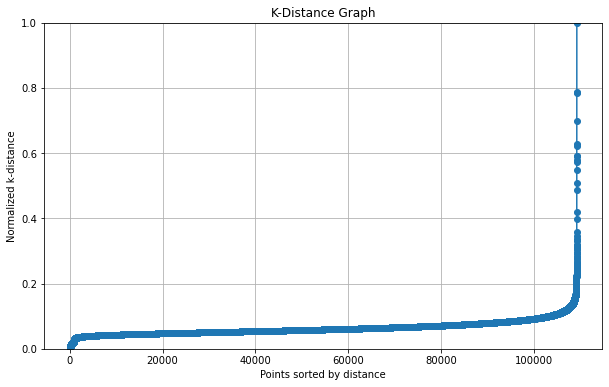

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# Function to calculate k-distance graph
def calculate_k_distance(X, k):
    # Fit nearest neighbors model
    nn = NearestNeighbors(n_neighbors=k)
    nn.fit(X)
    distances, _ = nn.kneighbors(X)
    # Calculate k-distance for each point
    k_distances = np.max(distances, axis=1)
    # Sort distances in ascending order
    k_distances_sorted = np.sort(k_distances)
    # Normalize distances to range [0, 1]
    k_distances_sorted = (k_distances_sorted - np.min(k_distances_sorted)) / (np.max(k_distances_sorted) - np.min(k_distances_sorted))
    return k_distances_sorted

# Function to plot k-distance graph
def plot_k_distance_graph(k_distances_sorted):
    plt.figure(figsize=(10, 6))
    plt.plot(np.arange(1, len(k_distances_sorted) + 1), k_distances_sorted, marker='o', linestyle='-')
    plt.xlabel('Points sorted by distance')
    plt.ylabel('Normalized k-distance')
    plt.title('K-Distance Graph')
    plt.ylim(0, 1.0)  # Set y-axis limits to [0, 1.0]
    plt.grid(True)
    plt.show()

# Example usage
# X is your data
# k is the minimum number of points required to form a dense region
k = 25  # Example value of k
k_distances_sorted = calculate_k_distance(X, k)
plot_k_distance_graph(k_distances_sorted)


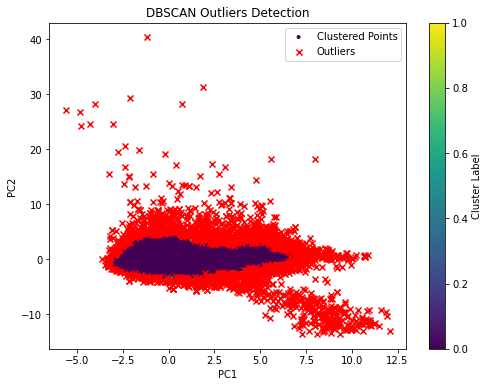

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

# Initialize PCA with 3 components
pca = PCA(n_components=2)

# Fit PCA to your data and transform it
X_pca = pca.fit_transform(X)

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.1, min_samples=5)
cluster_labels = dbscan.fit_predict(X_pca)

# Find indices of outliers (points labeled as -1 by DBSCAN)
outlier_indices = np.where(cluster_labels == -1)[0]

# Plot the clusters
plt.figure(figsize=(8, 6))

# Plot points belonging to clusters
plt.scatter(X_pca[cluster_labels != -1, 0], X_pca[cluster_labels != -1, 1], c=cluster_labels[cluster_labels != -1], marker='.', label='Clustered Points')

# Plot outliers separately with a different marker
plt.scatter(X_pca[outlier_indices, 0], X_pca[outlier_indices, 1], c='red', marker='x', label='Outliers')

plt.title("DBSCAN Outliers Detection")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label='Cluster Label')
plt.legend()
plt.show()

In [7]:
np.unique(dbscan.labels_, return_counts=True)

(array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
         12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
         25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
         38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
         51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
         64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
         77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
         90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
        103, 104, 105, 106, 107, 108, 109], dtype=int64),
 array([  2135, 105966,     33,      7,     10,      8,     16,      8,
             7,     10,     11,     14,     15,     12,      5,     21,
             7,      7,      8,     26,     27,      5,     18,     15,
            14,      9,      9,      7,     13,     12,     14,      8,
             5,     14,      6,      7,      9,      6,      6,      6

In [8]:
outliers = df.loc[np.where(dbscan.labels_==-1)].select_dtypes(include=np.number)

In [9]:
outliers

,disc_number,duration_ms,popularity,track_number,album_total_tracks,danceability,energy,key,loudness,mode,...,instrumentalness,liveness,valence,tempo,time_signature,tempo_confidence,time_signature_confidence,key_confidence,mode_confidence,n_bars
152,1.0,563.84,50.0,1.0,1.0,0.62,0.92,9.0,-5.22,1,...,0.82,0.12,0.21,146.00,4.0,0.94,0.96,0.61,0.52,344.0
191,1.0,621.17,46.0,1.0,1.0,0.45,0.75,7.0,-13.81,1,...,0.84,0.12,0.03,115.01,4.0,0.46,0.80,0.27,0.46,300.0
317,1.0,174.65,77.0,2.0,12.0,0.90,0.96,4.0,-3.20,1,...,0.00,0.03,0.91,129.97,4.0,0.94,1.00,0.30,0.33,91.0
641,1.0,118.47,0.0,32.0,40.0,0.90,0.60,2.0,-5.56,1,...,0.00,0.62,0.76,87.04,4.0,0.26,1.00,0.16,0.00,41.0
1036,3.0,174.29,52.0,16.0,225.0,0.78,0.36,7.0,-9.96,1,...,0.00,0.07,0.91,141.17,4.0,0.80,0.99,0.67,0.63,99.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107898,1.0,290.66,20.0,1.0,1.0,0.69,0.99,11.0,0.40,0,...,0.00,0.05,0.34,175.33,4.0,0.66,1.00,0.32,0.28,208.0
107928,1.0,454.25,19.0,10.0,15.0,0.49,0.91,11.0,-5.42,0,...,0.09,0.19,0.54,177.22,4.0,0.54,1.00,0.38,0.56,333.0
107949,1.0,328.20,15.0,3.0,6.0,0.68,0.94,9.0,-2.57,0,...,0.35,0.14,0.56,174.04,4.0,0.88,1.00,0.53,0.42,234.0
108607,1.0,453.60,40.0,2.0,2.0,0.34,0.92,2.0,-7.04,1,...,0.55,0.10,0.33,180.02,4.0,0.44,0.96,0.00,0.22,336.0


# Metodo 1: li elimino

In [10]:
# Identify outlier rows in sub_df
outlier_indices = outliers.index

# Remove outlier rows from original_df
cleaned_df = df.drop(outlier_indices)

# cleaned_df now contains original_df without the outlier rows

In [11]:
cleaned_df

,id,name,disc_number,duration_ms,explicit,popularity,track_number,artists,album_type,album_name,...,valence,tempo,time_signature,tempo_confidence,time_signature_confidence,key_confidence,mode_confidence,n_bars,genre,popularity_artist
0,4rjA5kJJWbwU1prXCvg6Fk,Grey,1.0,290.48,False,52.0,5.0,Kölsch,album,1989,...,0.24,186.00,3.0,0.02,1.00,0.50,0.52,234.0,minimal-techno,[51.0]
1,6xzpUzzIquIyUzTLbbgSdI,Thrown,1.0,539.23,False,45.0,5.0,Kiasmos,album,Kiasmos,...,0.14,120.02,4.0,0.68,0.33,0.41,0.59,269.0,minimal-techno,[47.0]
2,56tXgHlSHCfgmGhwVXNizc,Routine,1.0,264.20,False,39.0,5.0,Joris Delacroix,album,Night Visions,...,0.32,118.05,3.0,0.85,0.46,0.90,0.76,171.0,minimal-techno,[44.0]
3,0s3wIBczp6TdSJ2y8cveJl,Confronted - Anfisa Letyago Stranger Remix,1.0,387.41,False,0.0,6.0,Pan-Pot;Anfisa Letyago,single,Confronted Remixes,...,0.04,128.99,4.0,0.88,0.50,0.51,0.50,207.0,minimal-techno,"[36.0, 40.0]"
4,4PSbDDd1LRYMhqPXvza6I2,Jupiter Sunrise,1.0,248.96,False,0.0,1.0,Kollektiv Turmstrasse,compilation,10 Years Diynamic,...,0.12,120.00,4.0,0.88,1.00,0.47,0.46,123.0,minimal-techno,[45.0]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109144,0wiDjWz3U1WfwXSrWHXe2b,I'm Good (Blue) - REAPER Extended Remix,1.0,209.66,True,23.0,2.0,David Guetta;Bebe Rexha;REAPER,single,I'm Good (Blue) [REAPER Remix],...,0.37,173.96,4.0,0.73,1.00,0.09,0.18,145.0,edm,"[86.0, 79.0, 50.0]"
109145,46n9OJc7LOIVdj8t2l5WA5,End Of The Night,1.0,205.72,True,56.0,1.0,Danny Avila,single,End Of The Night,...,0.31,99.97,4.0,0.71,1.00,0.40,0.54,84.0,edm,[47.0]
109146,127uq83uGFapbddqiMUKky,Sexy Bitch (feat. Akon),1.0,195.85,True,80.0,3.0,David Guetta;Akon,album,One More Love,...,0.80,130.01,4.0,0.81,0.99,0.10,0.33,106.0,edm,"[86.0, 79.0]"
109147,0ZdUHFxifUJNqo7G4aJzoF,Savannah,1.0,208.70,False,60.0,1.0,Diviners;Philly K.,single,Savannah,...,0.39,108.07,4.0,0.65,1.00,0.55,0.60,89.0,edm,"[47.0, 38.0]"


In [12]:
cleaned_df.to_csv('DBSCAN_cleaned_df.csv')

# Metodo 2: sostituisco con media/mediana

In [80]:
import numpy as np

# Identify outlier rows in sub_df
outlier_indices = outliers.index

# Calculate mean values of each column excluding outlier rows
non_outlier_data = df.drop(outlier_indices).select_dtypes(include=np.number).values
means = np.mean(non_outlier_data, axis=0)

# Replace outlier values with means using NumPy indexing
numeric_columns = df.select_dtypes(include=np.number).columns
df.loc[outlier_indices, numeric_columns] = means

old_outlier_indices=outlier_indices

# original_df now contains outlier rows replaced with means of each column


In [81]:
df.loc[outlier_indices]

,Unnamed: 0,id,name,disc_number,duration_ms,explicit,popularity,track_number,artists,album_type,...,valence,tempo,time_signature,tempo_confidence,time_signature_confidence,key_confidence,mode_confidence,n_bars,genre,popularity_artist
152,54745.321175,5EiohoCxbWCOyN1oq8PD2e,Werewolf Disco Club,1.019382,224.672845,False,31.877869,7.685308,I Hate Models,single,...,0.478142,122.355618,3.911253,0.4505,0.887268,0.488133,0.510684,115.345657,minimal-techno,[46.0]
191,54745.321175,0S0zgiheqNBkRjEMo7pnig,Lightning Over Heaven,1.019382,224.672845,False,31.877869,7.685308,Amelie Lens;Anyma,single,...,0.478142,122.355618,3.911253,0.4505,0.887268,0.488133,0.510684,115.345657,minimal-techno,"[51.0, 65.0]"
212,54745.321175,0eRbOJ7nguOh6UCV1Lbpwn,Two Steps from Heaven,1.019382,224.672845,False,31.877869,7.685308,I Hate Models,single,...,0.478142,122.355618,3.911253,0.4505,0.887268,0.488133,0.510684,115.345657,minimal-techno,[46.0]
317,54745.321175,7GNRUsU3M4XNDDB9xle5Dz,That That (prod. & feat. SUGA of BTS),1.019382,224.672845,False,31.877869,7.685308,PSY;SUGA,album,...,0.478142,122.355618,3.911253,0.4505,0.887268,0.488133,0.510684,115.345657,hip-hop,"[62.0, 67.0]"
524,54745.321175,1tEto4JrqNmBZFH5uAiYqb,Sadi Gali,1.019382,224.672845,False,31.877869,7.685308,Lehmber Hussainpuri,album,...,0.478142,122.355618,3.911253,0.4505,0.887268,0.488133,0.510684,115.345657,hip-hop,[47.0]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107854,54745.321175,5yE3xtSrNkwFo1yP3tDA40,Deadly Deep Subs (Remix) [2015 Remaster],1.019382,224.672845,False,31.877869,7.685308,Dillinja,single,...,0.478142,122.355618,3.911253,0.4505,0.887268,0.488133,0.510684,115.345657,drum-and-bass,[29.0]
107898,54745.321175,2wOnY5bQD1TsDHH382Ybta,Hillbilly,1.019382,224.672845,False,31.877869,7.685308,Serum,single,...,0.478142,122.355618,3.911253,0.4505,0.887268,0.488133,0.510684,115.345657,drum-and-bass,[44.0]
107949,54745.321175,5qGr7pdECoN1ciAtsynuCM,The Last Light,1.019382,224.672845,False,31.877869,7.685308,Alix Perez;Ivy Lab,single,...,0.478142,122.355618,3.911253,0.4505,0.887268,0.488133,0.510684,115.345657,drum-and-bass,"[42.0, 40.0]"
108607,54745.321175,2pFPvMME9cynR1dokBTHJJ,There's No Other Place,1.019382,224.672845,False,31.877869,7.685308,Inhaler,single,...,0.478142,122.355618,3.911253,0.4505,0.887268,0.488133,0.510684,115.345657,dub,[55.0]


## Controllo se effettivamente non lo sono più

In [82]:
numeric_df = df.select_dtypes(include=np.number)  # il df adesso ha le medie al posto degli out

X=numeric_df.values

from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
X = scl.fit_transform(X)

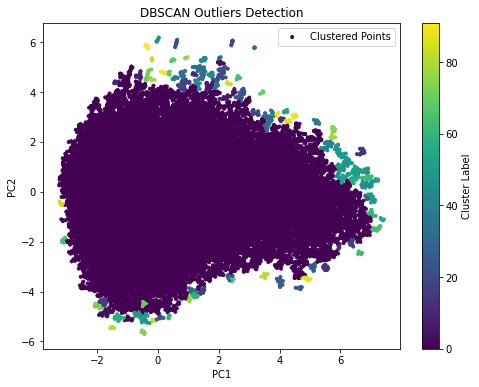

In [91]:
# Initialize PCA with 3 components
pca = PCA(n_components=2)

# Fit PCA to your data and transform it
X_pca = pca.fit_transform(X)

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.1, min_samples=5)
cluster_labels = dbscan.fit_predict(X_pca)

# Find indices of outliers (points labeled as -1 by DBSCAN)
outlier_indices = np.where(cluster_labels == -1)[0]

# Plot the clusters
plt.figure(figsize=(8, 6))

# Plot points belonging to clusters
plt.scatter(X_pca[cluster_labels != -1, 0], X_pca[cluster_labels != -1, 1], c=cluster_labels[cluster_labels != -1], marker='.', label='Clustered Points')

plt.title("DBSCAN Outliers Detection")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label='Cluster Label')
plt.legend()
plt.show()